In [51]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [52]:
leases = pd.read_csv('datafest-data-read-only/Leases.csv')
print(leases.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            194685 non-null  int64  
 1   quarter                         194685 non-null  object 
 2   monthsigned                     193822 non-null  float64
 3   market                          194685 non-null  object 
 4   building_name                   157999 non-null  object 
 5   building_id                     194685 non-null  object 
 6   address                         194685 non-null  object 
 7   region                          194685 non-null  object 
 8   city                            194685 non-null  object 
 9   state                           194685 non-null  object 
 10  zip                             194684 non-null  float64
 11  internal_submarket              194685 non-null  object 
 12  internal_class  

In [53]:
priceANDavailability = pd.read_csv('datafest-data-read-only/Price_and_Availability_Data.csv')
print(priceANDavailability.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            1680 non-null   int64  
 1   quarter                         1680 non-null   object 
 2   market                          1680 non-null   object 
 3   internal_class                  1680 non-null   object 
 4   RBA                             1680 non-null   int64  
 5   available_space                 1680 non-null   int64  
 6   availability_proportion         1680 non-null   float64
 7   internal_class_rent             1680 non-null   float64
 8   overall_rent                    1680 non-null   float64
 9   direct_available_space          1380 non-null   float64
 10  direct_availability_proportion  1380 non-null   float64
 11  direct_internal_class_rent      1380 non-null   float64
 12  direct_overall_rent             13

In [54]:
majorMarket = pd.read_csv('datafest-data-read-only/Major_Market_Occupancy_Data-revised.csv')
print(majorMarket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           190 non-null    int64  
 1   quarter                        190 non-null    object 
 2   market                         190 non-null    object 
 3   ending_occupancy_proportion    190 non-null    float64
 4   starting_occupancy_proportion  190 non-null    float64
 5   avg_occupancy_proportion       190 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.0+ KB
None


In [55]:
unemployment = pd.read_csv('datafest-data-read-only/Unemployment.csv')
print(unemployment.describe())
print(unemployment.info())

              year        month  unemployment_rate
count  1848.000000  1848.000000        1848.000000
mean   2021.000000     6.500000           4.515368
std       2.000541     3.452987           2.214930
min    2018.000000     1.000000           1.800000
25%    2019.000000     3.750000           3.300000
50%    2021.000000     6.500000           4.000000
75%    2023.000000     9.250000           4.800000
max    2024.000000    12.000000          22.600000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1848 non-null   int64  
 1   quarter            1848 non-null   object 
 2   month              1848 non-null   int64  
 3   state              1848 non-null   object 
 4   unemployment_rate  1848 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 72.3+ KB
None


In [56]:
main_without_majorMarketInfo2018 = pd.merge(leases, priceANDavailability, on=['year', 'quarter', 'market'], how='inner')

main_with_majorMarketInfo2020 = pd.merge(main_without_majorMarketInfo2018, majorMarket, on=['year', 'quarter', 'market'], how='inner')
#Sample size significantly decrease as majorMarket dataset only contains data after 2020, we lost three years of data.

print("Main without major markets Dataset Infomation")
print(main_without_majorMarketInfo2018.info())
print("")
print("")
print("Main with major markets Dataset Infomation")
print(main_with_majorMarketInfo2020.info())

Main without major markets Dataset Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291088 entries, 0 to 291087
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              291088 non-null  int64  
 1   quarter                           291088 non-null  object 
 2   monthsigned                       289722 non-null  float64
 3   market                            291088 non-null  object 
 4   building_name                     237882 non-null  object 
 5   building_id                       291088 non-null  object 
 6   address                           291088 non-null  object 
 7   region                            291088 non-null  object 
 8   city                              291088 non-null  object 
 9   state                             291088 non-null  object 
 10  zip                               291086 non-null  float64
 11  intern

In [57]:
columns_to_drop = [
    "building_name", "building_id", "address", "zip", 
    "direct_available_space", "direct_availability_proportion", 
    "direct_internal_class_rent", "direct_overall_rent", 
    "sublet_available_space", "sublet_availability_proportion", 
    "sublet_internal_class_rent", "sublet_overall_rent", "company_name", "internal_market_cluster"
    
]

# Keep only columns that are present
existing_cols = [col for col in columns_to_drop if col in main_without_majorMarketInfo2018.columns]

# Drop safely
main_without_majorMarketInfo2018_drop = main_without_majorMarketInfo2018.drop(existing_cols, axis=1)
main_without_majorMarketInfo2018_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291088 entries, 0 to 291087
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              291088 non-null  int64  
 1   quarter                           291088 non-null  object 
 2   monthsigned                       289722 non-null  float64
 3   market                            291088 non-null  object 
 4   region                            291088 non-null  object 
 5   city                              291088 non-null  object 
 6   state                             291088 non-null  object 
 7   internal_submarket                291088 non-null  object 
 8   internal_class_x                  291082 non-null  object 
 9   leasedSF                          291088 non-null  float64
 10  internal_industry                 41176 non-null   object 
 11  transaction_type                  290340 non-null  o

In [58]:
main_without_majorMarketInfo2018_drop.drop(columns = "internal_industry").dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 232956 entries, 11282 to 291083
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              232956 non-null  int64  
 1   quarter                           232956 non-null  object 
 2   monthsigned                       232956 non-null  float64
 3   market                            232956 non-null  object 
 4   region                            232956 non-null  object 
 5   city                              232956 non-null  object 
 6   state                             232956 non-null  object 
 7   internal_submarket                232956 non-null  object 
 8   internal_class_x                  232956 non-null  object 
 9   leasedSF                          232956 non-null  float64
 10  transaction_type                  232956 non-null  object 
 11  costarID                          232956 non-null  in

In [59]:
x = 'internal_class_x'
y = 'internal_class_y'
diff_count = (main_without_majorMarketInfo2018_drop[x] != main_without_majorMarketInfo2018_drop[y]).sum()
print(f"Number of differing values of {x}: {diff_count}")


Number of differing values of internal_class_x: 145547


In [60]:
cols_to_drop = [col for col in main_without_majorMarketInfo2018_drop.columns if col.endswith('_y')]
main_without_majorMarketInfo2018_drop.drop(columns=cols_to_drop, inplace=True)
main_without_majorMarketInfo2018_drop.rename(
    columns={col: col[:-2] for col in main_without_majorMarketInfo2018.columns if col.endswith('_x')},
    inplace=True
)
main_without_majorMarketInfo2018_drop = main_without_majorMarketInfo2018_drop[main_without_majorMarketInfo2018_drop['leasedSF'] >= 10000]
main_without_majorMarketInfo2018_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44214 entries, 0 to 291087
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            44214 non-null  int64  
 1   quarter                         44214 non-null  object 
 2   monthsigned                     43142 non-null  float64
 3   market                          44214 non-null  object 
 4   region                          44214 non-null  object 
 5   city                            44214 non-null  object 
 6   state                           44214 non-null  object 
 7   internal_submarket              44214 non-null  object 
 8   internal_class                  44214 non-null  object 
 9   leasedSF                        44214 non-null  float64
 10  internal_industry               25790 non-null  object 
 11  transaction_type                43812 non-null  object 
 12  costarID                        4421

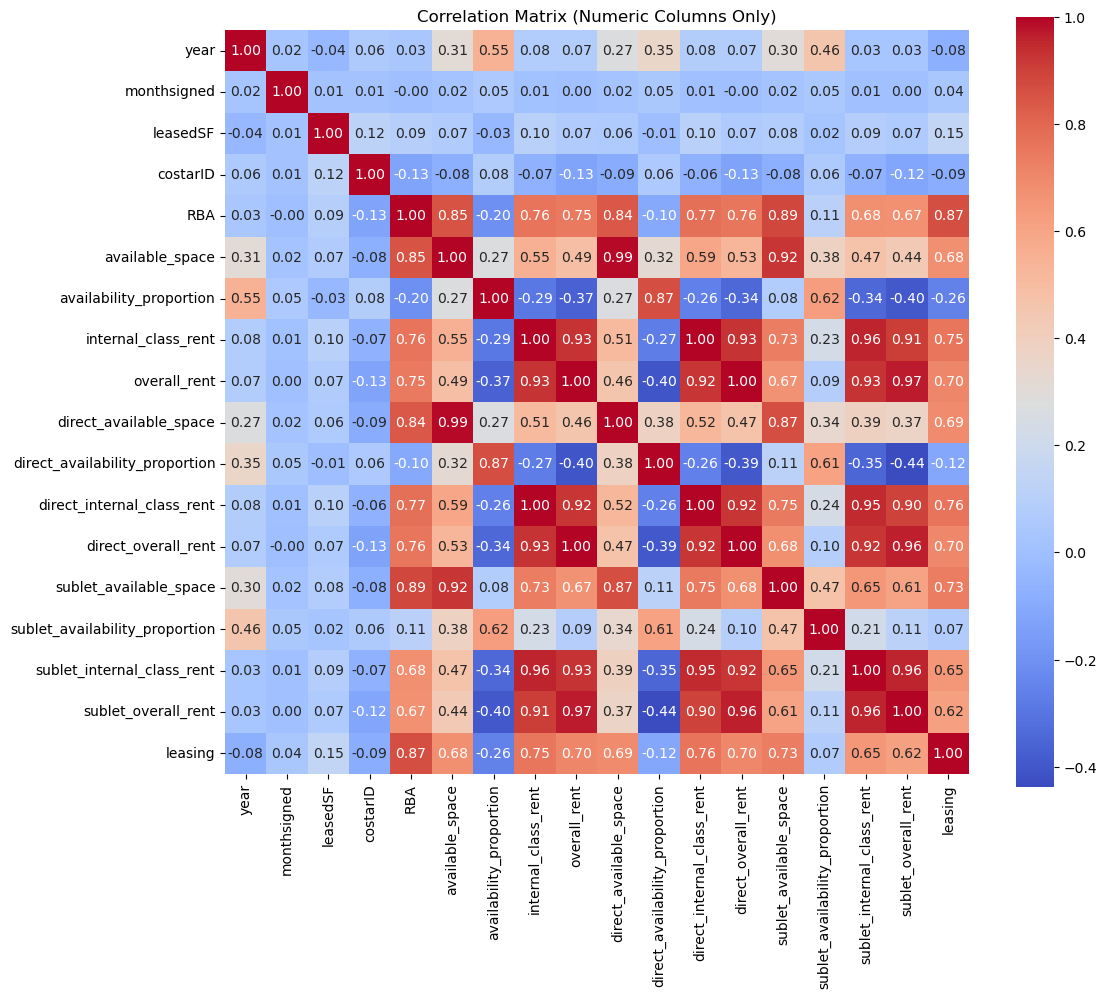

In [61]:
numeric_df = main_without_majorMarketInfo2018_drop.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Optional: display or visualize it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()


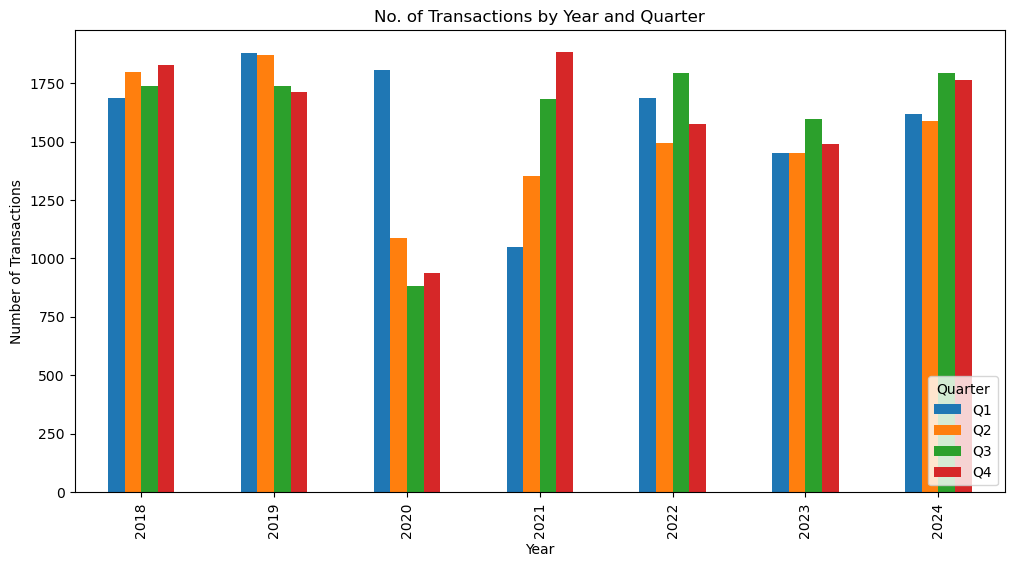

In [62]:
grouped_counts = main_without_majorMarketInfo2018_drop.groupby(['year', 'quarter']).size()

# 2. Unstack so that quarters become columns and years remain the index
grouped_counts = grouped_counts.unstack('quarter')  
# Now, grouped_counts has years on the rows and quarters on the columns

# 3. Create a bar plot with years on the x-axis and quarters in different colors
ax = grouped_counts.plot(kind='bar', figsize=(12, 6))
# 4. Label the axes and add a title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Transactions')
ax.set_title('No. of Transactions by Year and Quarter')

# 5. Show the legend and plot
plt.legend(title='Quarter', loc = 'lower right')
plt.show()

/tmp/ipykernel_3212/3878256604.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


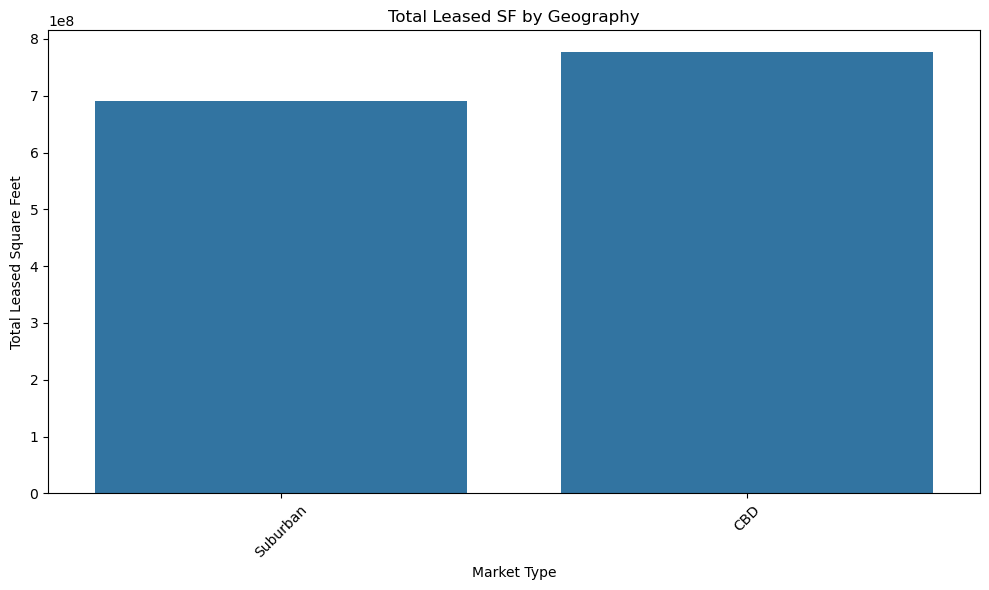

In [63]:

plt.figure(figsize=(10, 6))
sns.barplot(
    data=main_without_majorMarketInfo2018_drop,
    x='CBD_suburban',
    y='leasedSF',
    estimator=sum,
    ci=None
)
plt.title("Total Leased SF by Geography")
plt.ylabel("Total Leased Square Feet")
plt.xlabel("Market Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


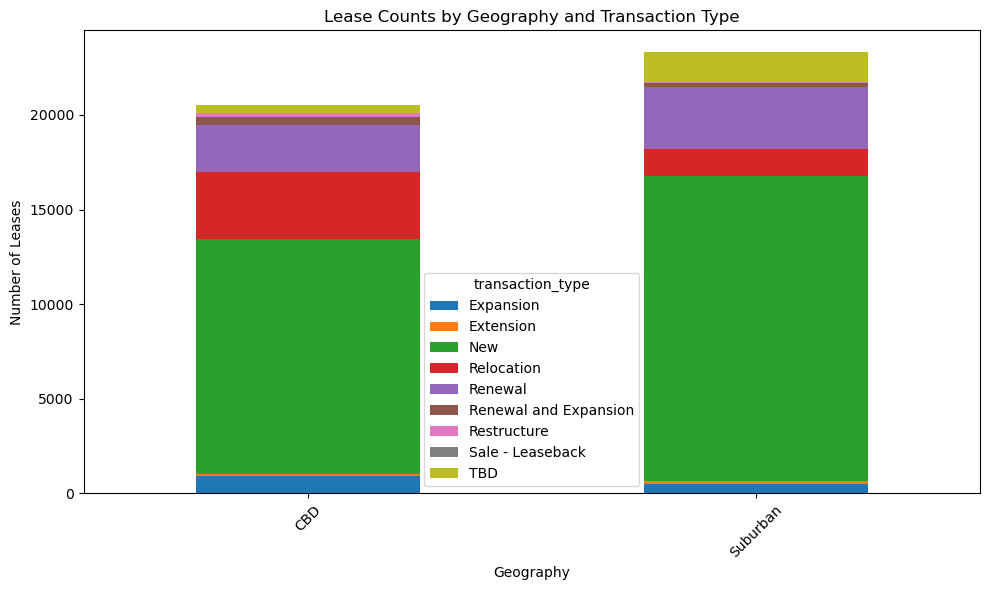

In [64]:
geo_txn = main_without_majorMarketInfo2018_drop.groupby(['CBD_suburban', 'transaction_type']).size().unstack(fill_value=0)

geo_txn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Lease Counts by Geography and Transaction Type")
plt.xlabel("Geography")
plt.ylabel("Number of Leases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


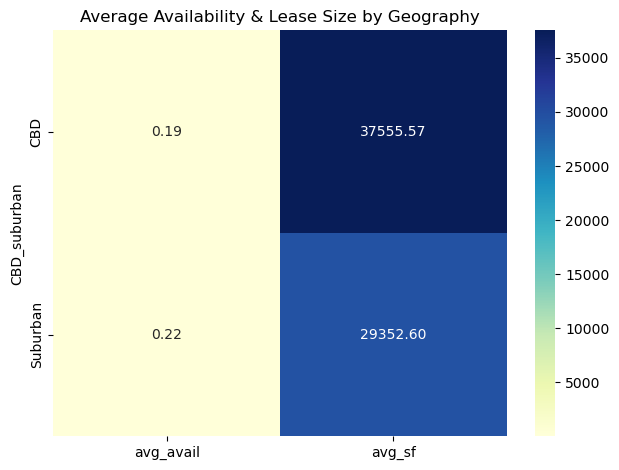

In [65]:
geo_avail = main_without_majorMarketInfo2018_drop.groupby('CBD_suburban').agg(
    avg_avail=('availability_proportion', 'mean'),
    avg_sf=('leasedSF', 'mean')
)

sns.heatmap(geo_avail, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Availability & Lease Size by Geography")
plt.tight_layout()
plt.show()


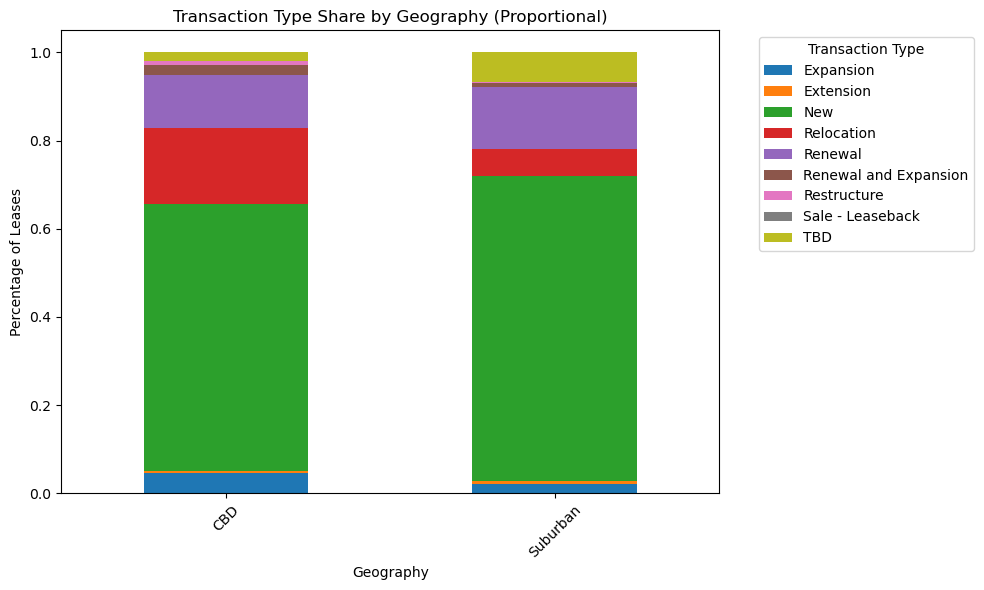

In [66]:
geo_txn_percent = geo_txn.div(geo_txn.sum(axis=1), axis=0)

geo_txn_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Transaction Type Share by Geography (Proportional)")
plt.ylabel("Percentage of Leases")
plt.xlabel("Geography")
plt.xticks(rotation=45)
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [85]:
main_with_majorMarketInfo2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75562 entries, 0 to 75561
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              75562 non-null  int64  
 1   quarter                           75562 non-null  object 
 2   monthsigned                       75334 non-null  float64
 3   market                            75562 non-null  object 
 4   building_name                     60794 non-null  object 
 5   building_id                       75562 non-null  object 
 6   address                           75562 non-null  object 
 7   region                            75562 non-null  object 
 8   city                              75562 non-null  object 
 9   state                             75562 non-null  object 
 10  zip                               75562 non-null  float64
 11  internal_submarket                75562 non-null  object 
 12  inte

In [86]:
columns_to_drop = [
    "building_name", "building_id", "address", "zip", 
    "direct_available_space", "direct_availability_proportion", 
    "direct_internal_class_rent", "direct_overall_rent", 
    "sublet_available_space", "sublet_availability_proportion", 
    "sublet_internal_class_rent", "sublet_overall_rent", "company_name", "internal_market_cluster", "costarID"
    
]

# Keep only columns that are present
existing_cols = [col for col in columns_to_drop if col in main_with_majorMarketInfo2020.columns]

# Drop safely
main_with_majorMarketInfo2020_drop = main_without_majorMarketInfo2018.drop(existing_cols, axis=1)

main_with_majorMarketInfo2020_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291088 entries, 0 to 291087
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              291088 non-null  int64  
 1   quarter                           291088 non-null  object 
 2   monthsigned                       289722 non-null  float64
 3   market                            291088 non-null  object 
 4   region                            291088 non-null  object 
 5   city                              291088 non-null  object 
 6   state                             291088 non-null  object 
 7   internal_submarket                291088 non-null  object 
 8   internal_class_x                  291082 non-null  object 
 9   leasedSF                          291088 non-null  float64
 10  internal_industry                 41176 non-null   object 
 11  transaction_type                  290340 non-null  o

In [87]:
cols_to_drop = [col for col in main_with_majorMarketInfo2020_drop.columns if col.endswith('_y')]
main_with_majorMarketInfo2020_drop.drop(columns=cols_to_drop, inplace=True)
main_with_majorMarketInfo2020_drop.rename(
    columns={col: col[:-2] for col in main_with_majorMarketInfo2020_drop.columns if col.endswith('_x')},
    inplace=True
)
main_with_majorMarketInfo2020_drop = main_with_majorMarketInfo2020_drop[main_with_majorMarketInfo2020_drop['leasedSF'] >= 10000]
main_with_majorMarketInfo2020_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44214 entries, 0 to 291087
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            44214 non-null  int64  
 1   quarter                         44214 non-null  object 
 2   monthsigned                     43142 non-null  float64
 3   market                          44214 non-null  object 
 4   region                          44214 non-null  object 
 5   city                            44214 non-null  object 
 6   state                           44214 non-null  object 
 7   internal_submarket              44214 non-null  object 
 8   internal_class                  44214 non-null  object 
 9   leasedSF                        44214 non-null  float64
 10  internal_industry               25790 non-null  object 
 11  transaction_type                43812 non-null  object 
 12  space_type                      3885

In [88]:
main_with_majorMarketInfo2020_drop = main_with_majorMarketInfo2020_drop.dropna()
main_with_majorMarketInfo2020_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18408 entries, 11350 to 291067
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            18408 non-null  int64  
 1   quarter                         18408 non-null  object 
 2   monthsigned                     18408 non-null  float64
 3   market                          18408 non-null  object 
 4   region                          18408 non-null  object 
 5   city                            18408 non-null  object 
 6   state                           18408 non-null  object 
 7   internal_submarket              18408 non-null  object 
 8   internal_class                  18408 non-null  object 
 9   leasedSF                        18408 non-null  float64
 10  internal_industry               18408 non-null  object 
 11  transaction_type                18408 non-null  object 
 12  space_type                      

In [ ]:
print(main_with_majorMarketInfo2020_drop)

        year quarter  monthsigned         market region           city state  \
11350   2019      Q1          1.0        Atlanta  South       Norcross    GA   
11351   2019      Q1          1.0        Atlanta  South       Norcross    GA   
11356   2019      Q1          1.0        Atlanta  South         Duluth    GA   
11357   2019      Q1          1.0        Atlanta  South         Duluth    GA   
11366   2019      Q1          1.0        Atlanta  South        Atlanta    GA   
...      ...     ...          ...            ...    ...            ...   ...   
291063  2024      Q4         12.0  San Francisco   West  San Francisco    CA   
291064  2024      Q4         12.0        Seattle   West       Bellevue    WA   
291065  2024      Q4         12.0        Seattle   West       Bellevue    WA   
291066  2024      Q4         12.0        Seattle   West    Federal Way    WA   
291067  2024      Q4         12.0        Seattle   West    Federal Way    WA   

              internal_submarket intern

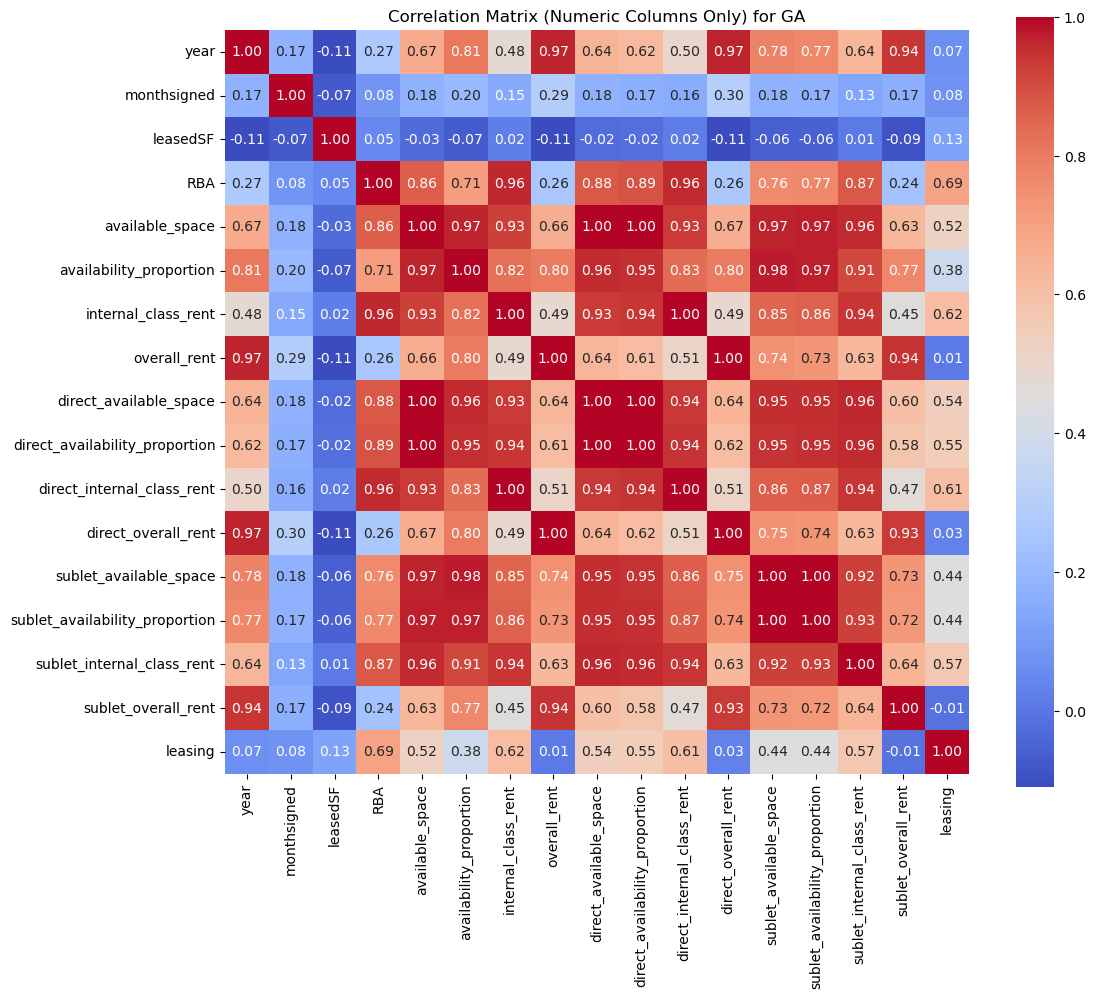

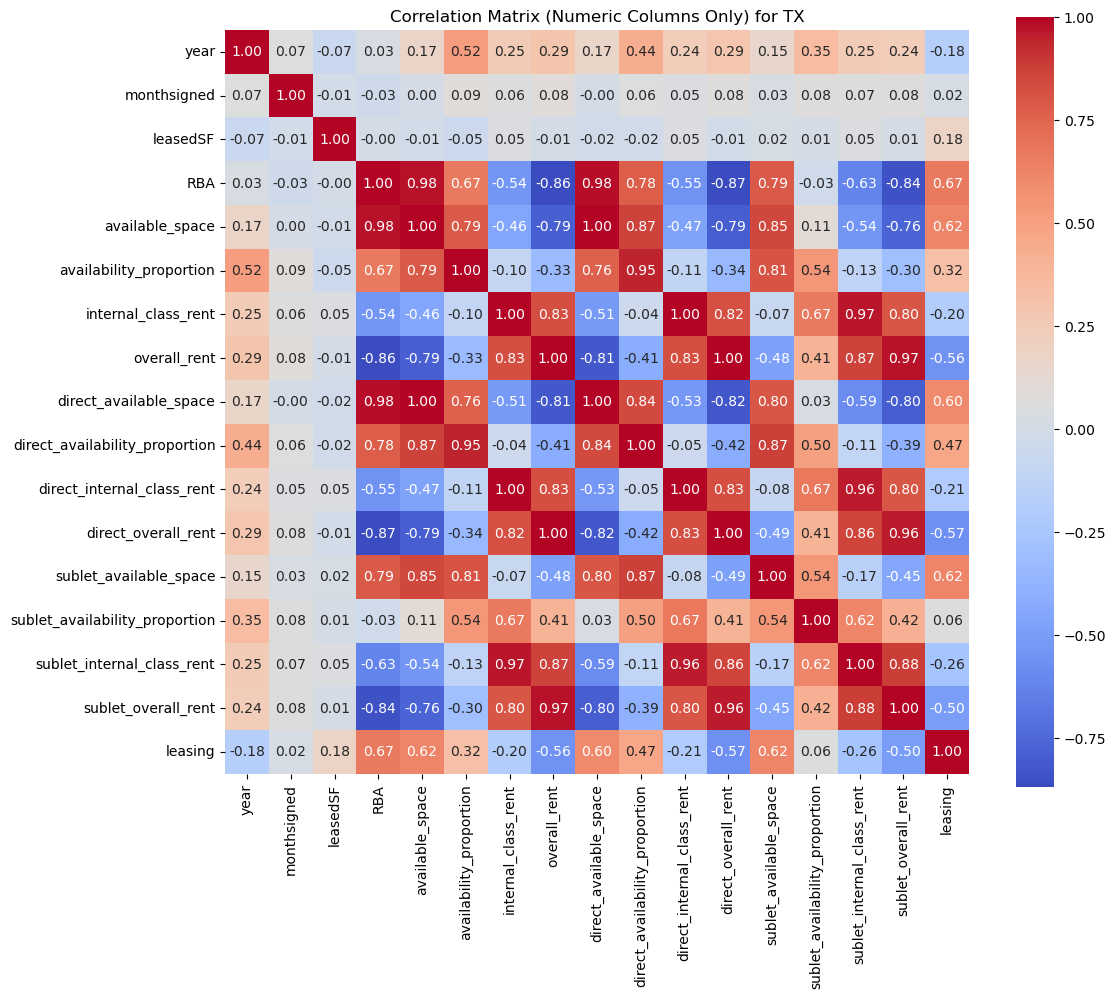

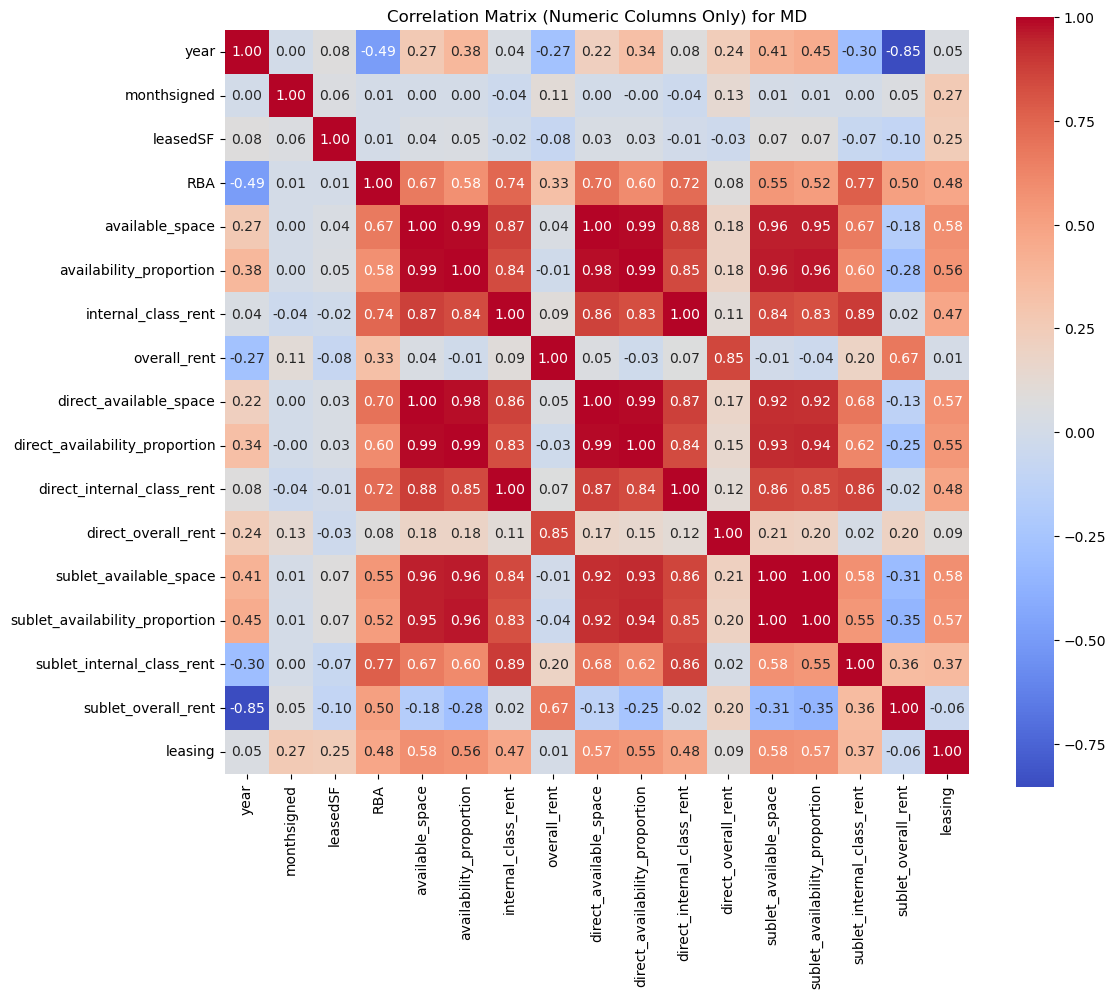

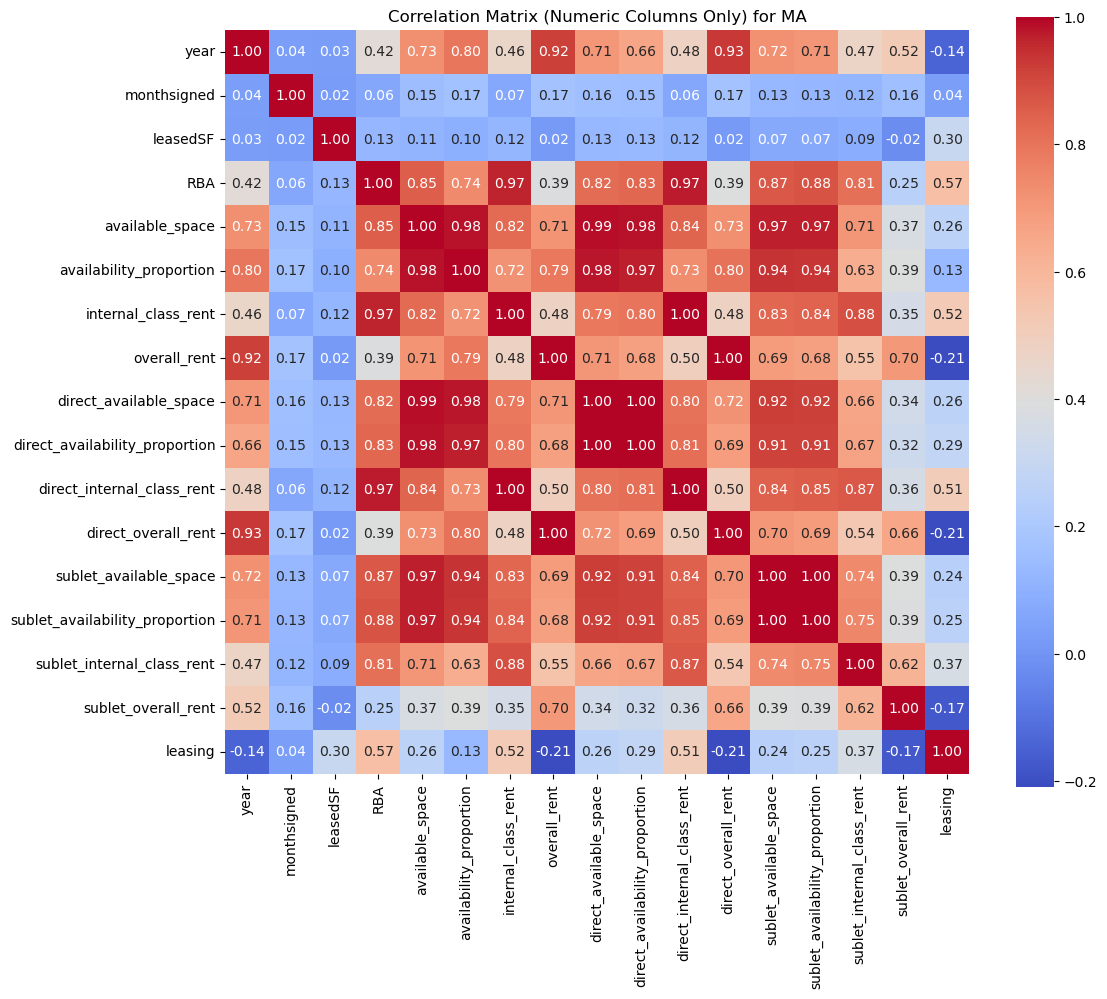

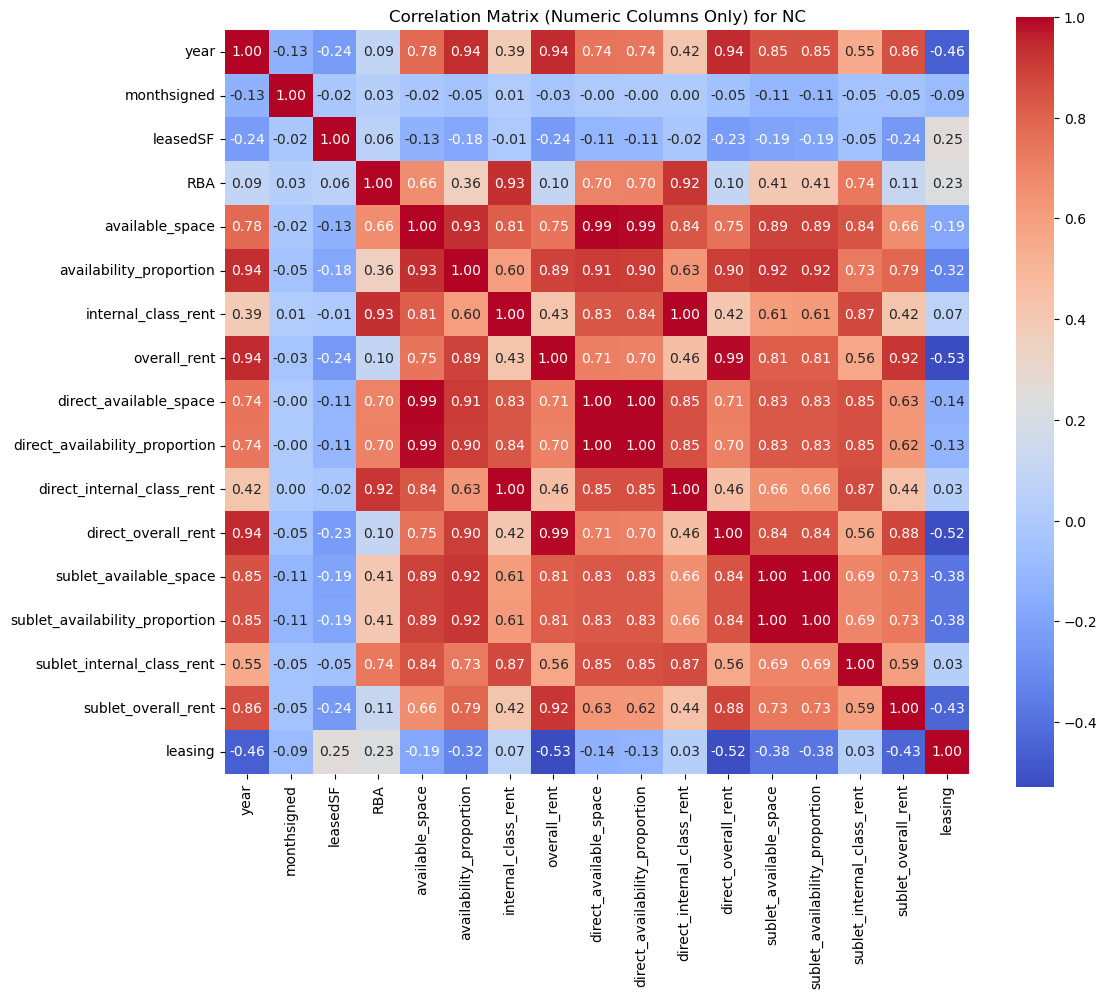

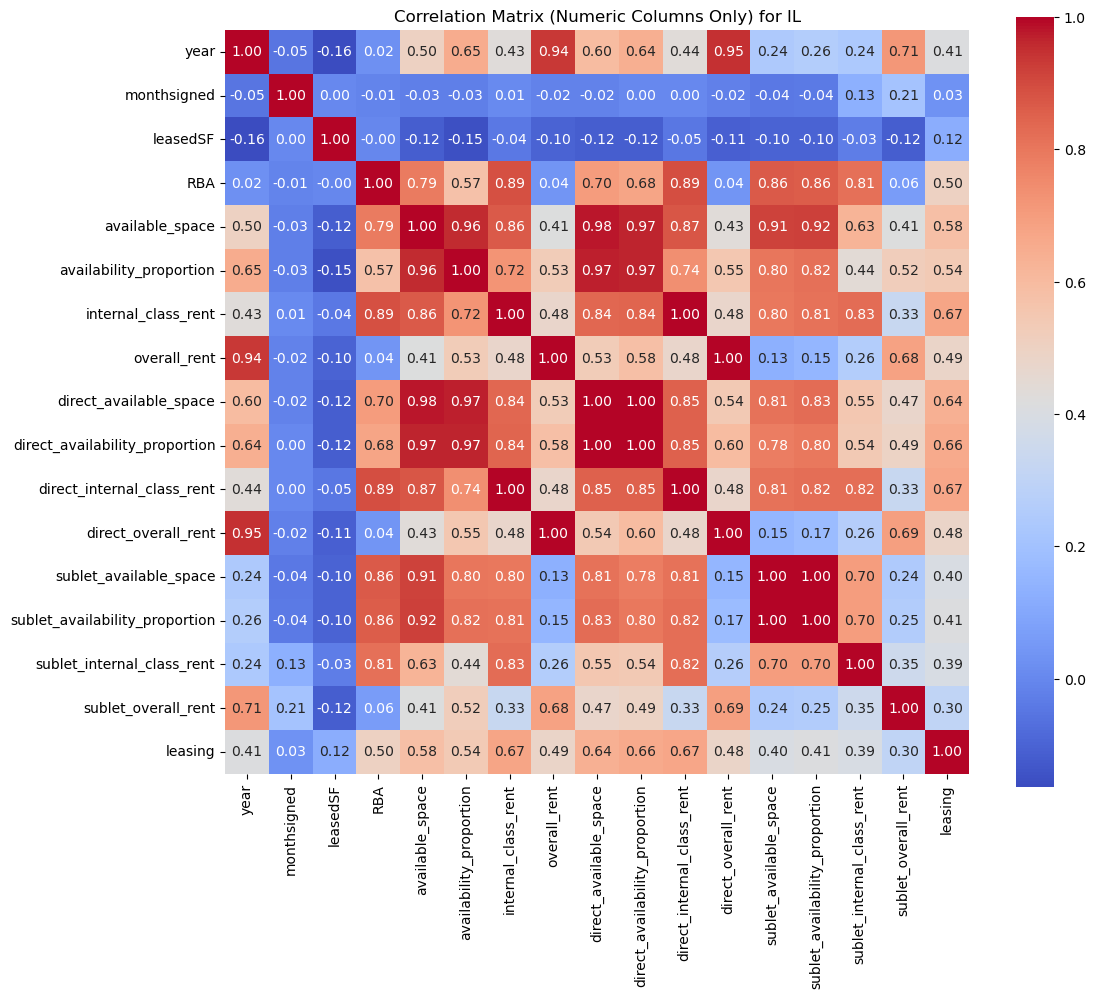

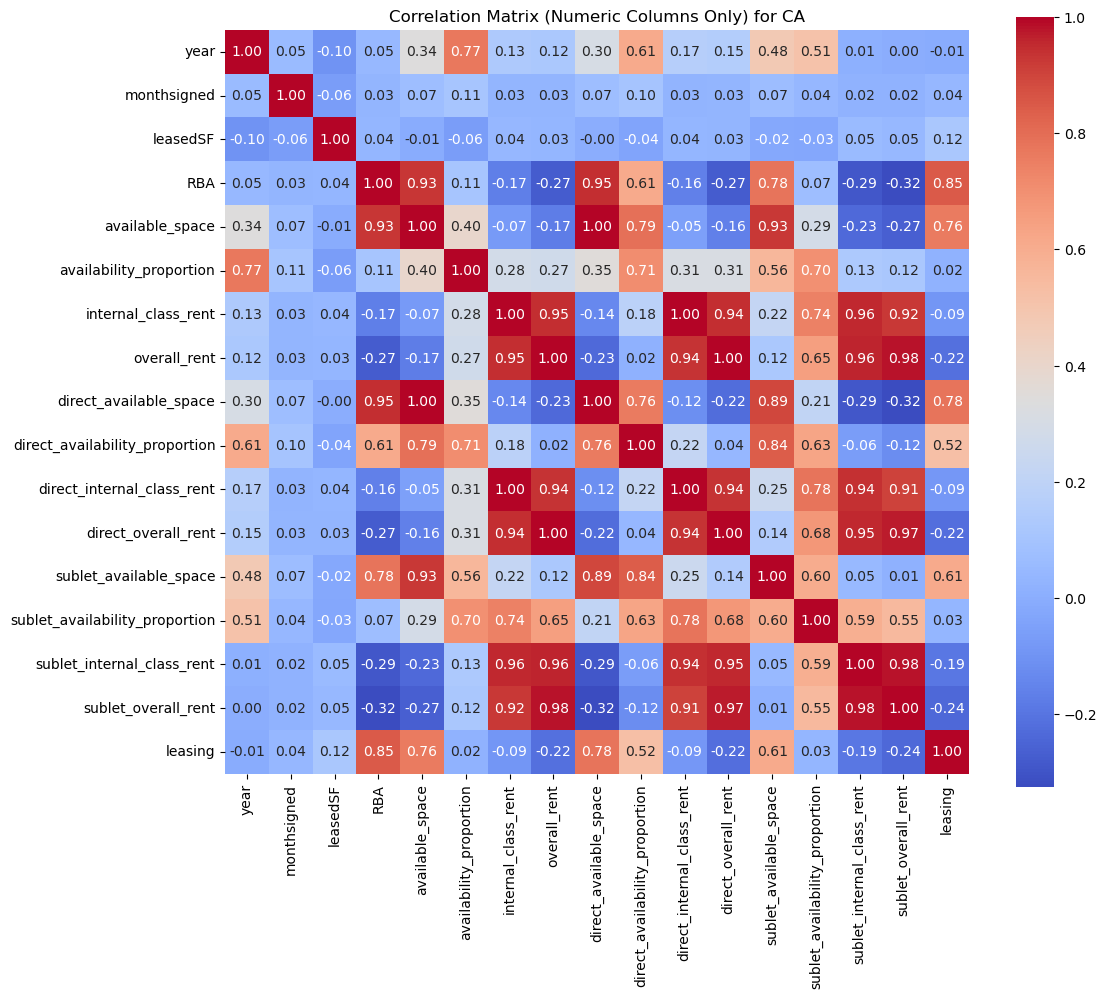

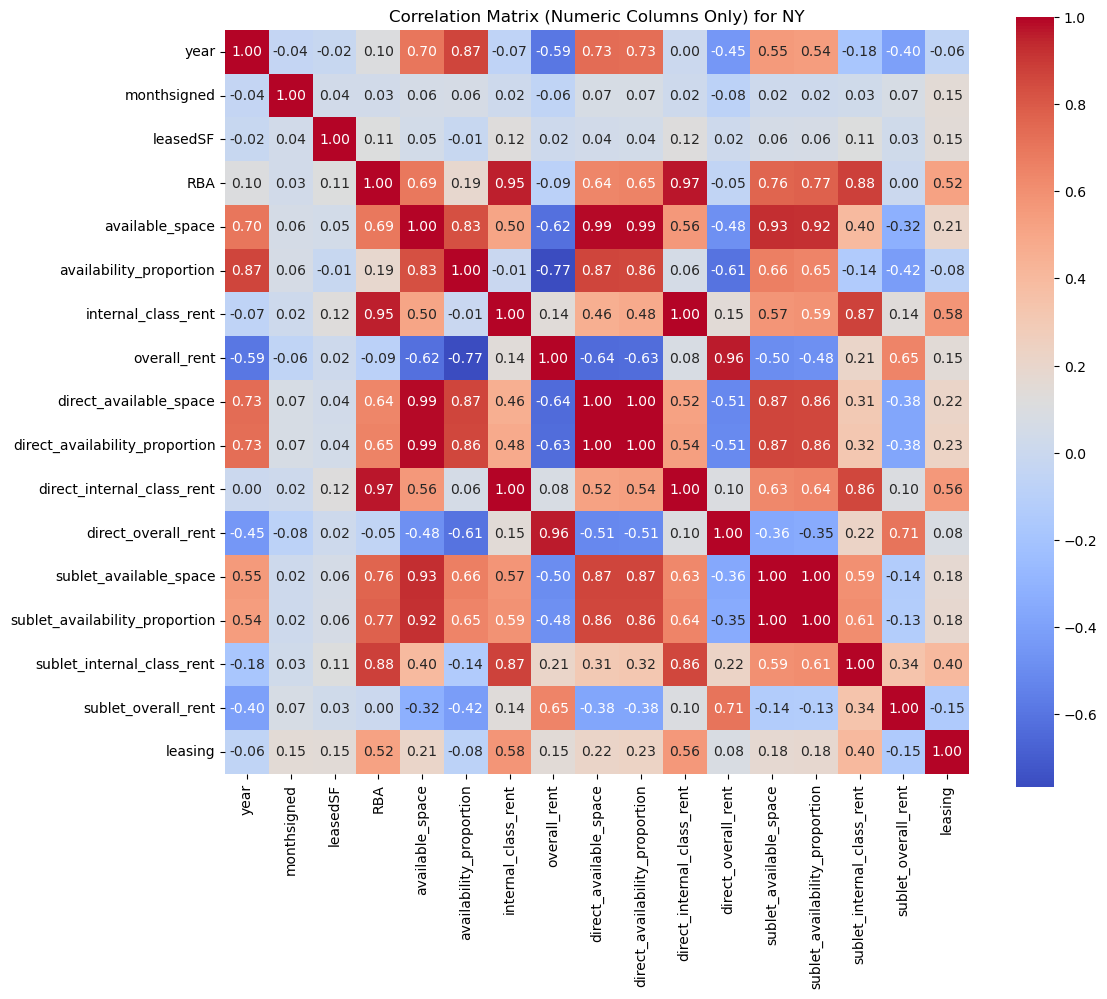

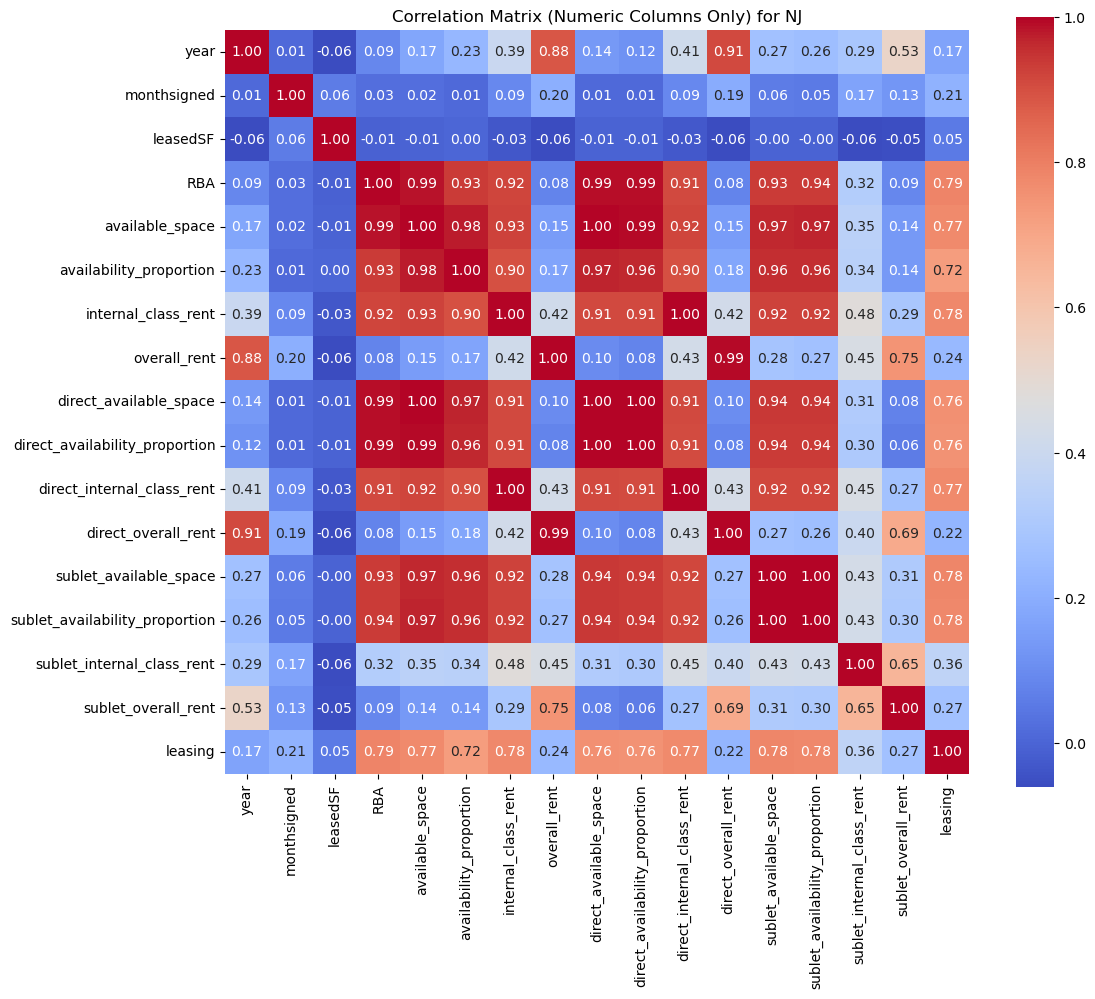

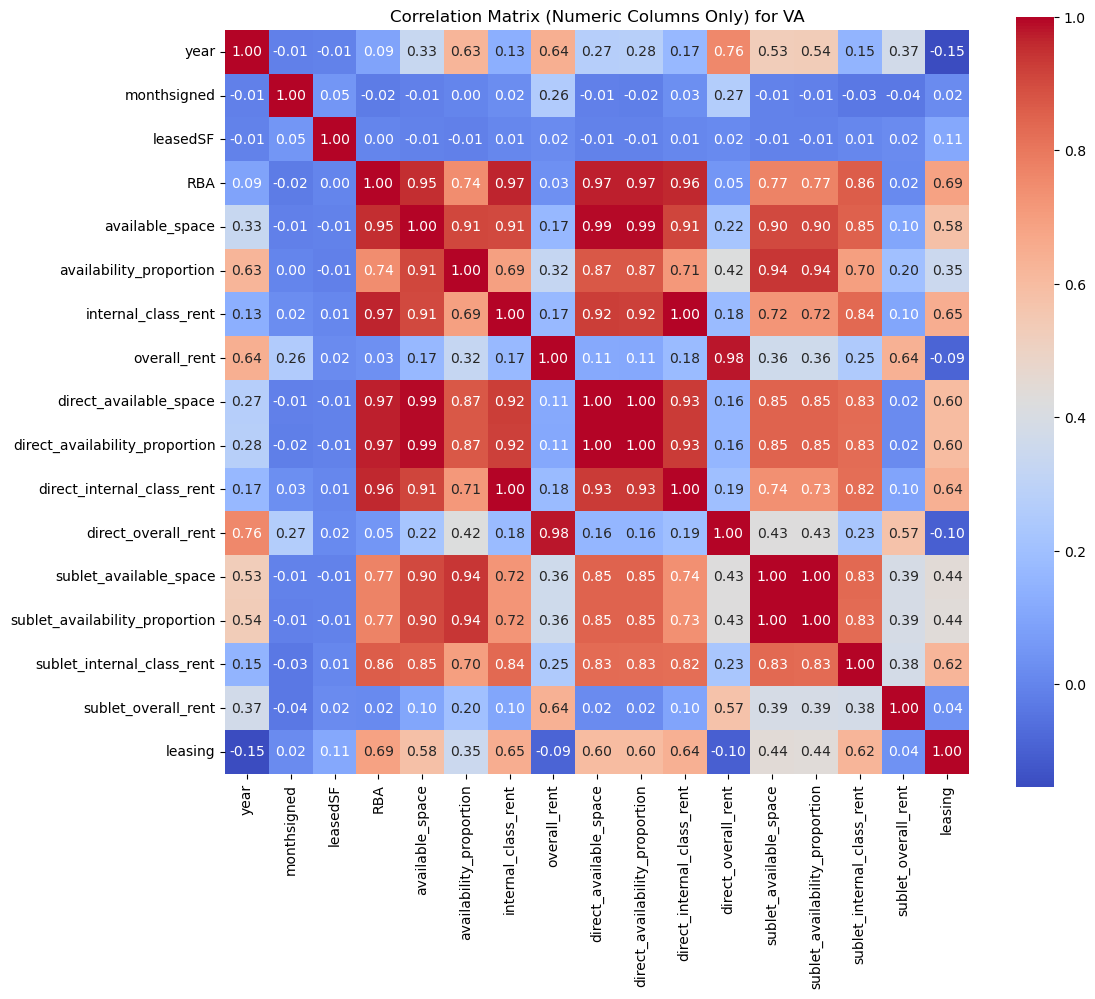

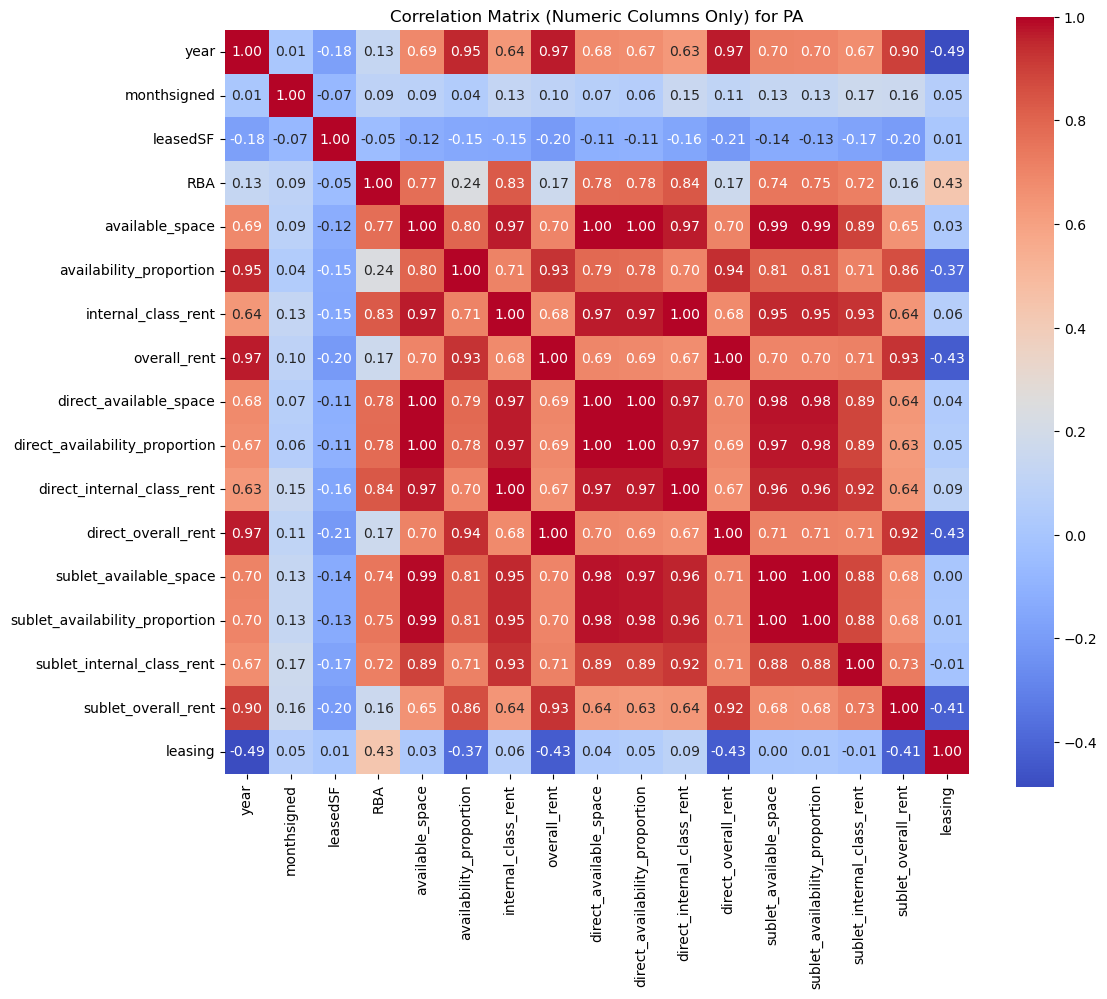

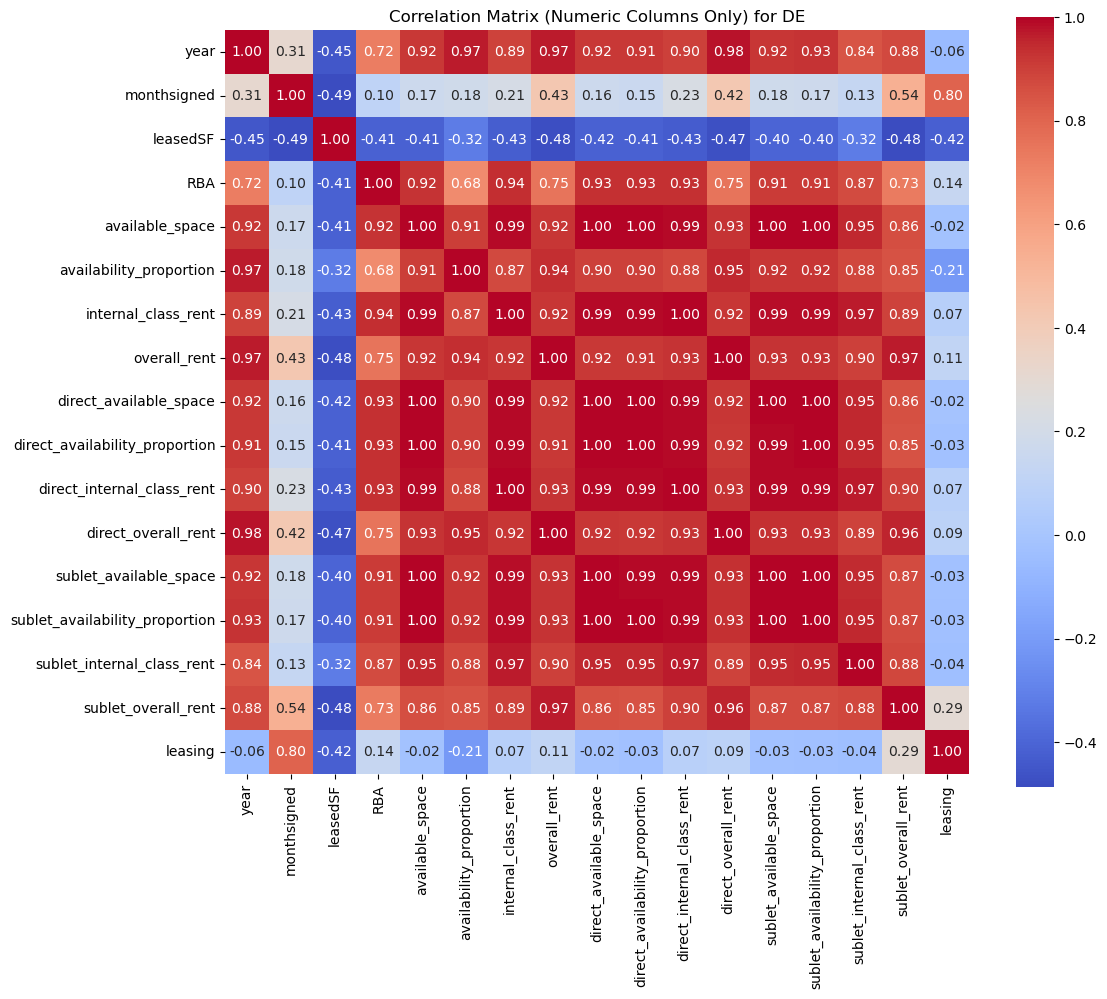

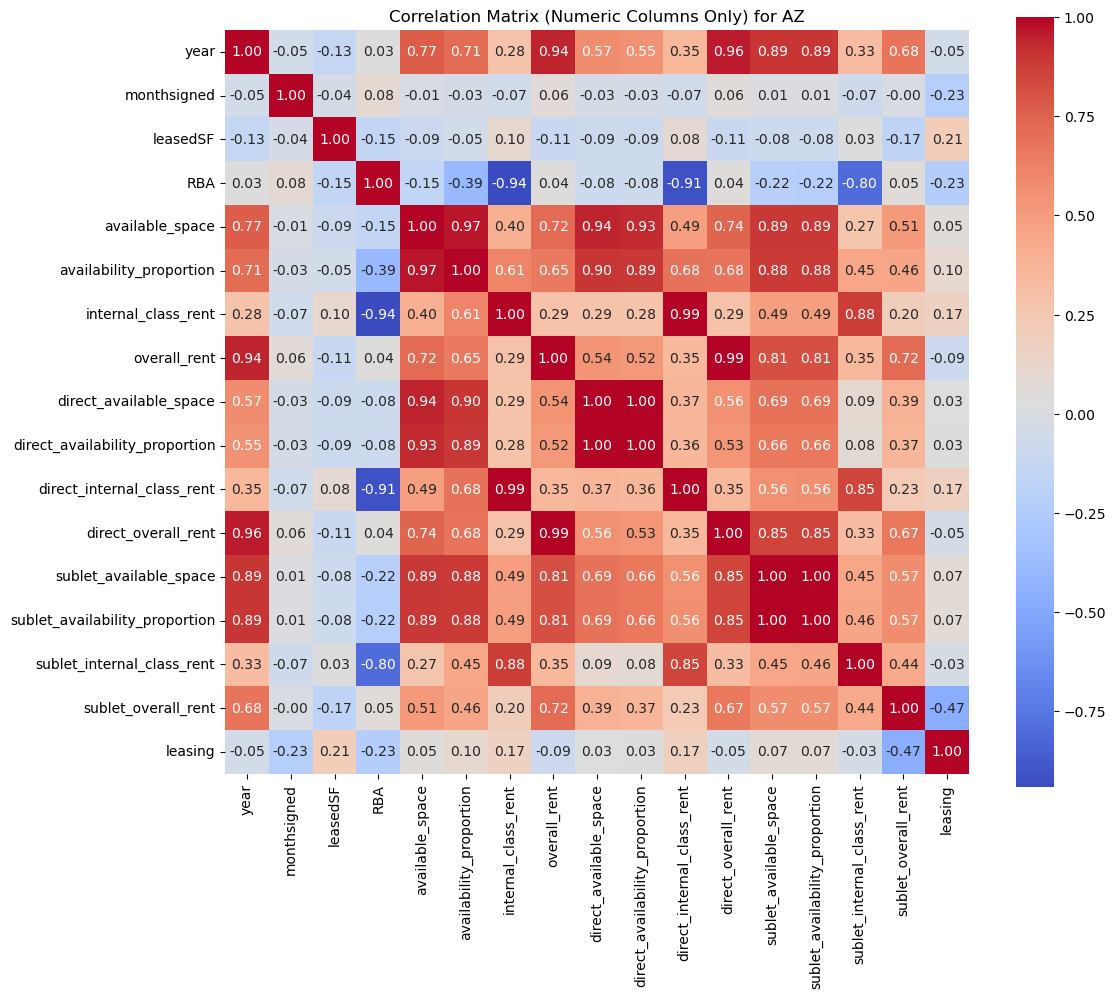

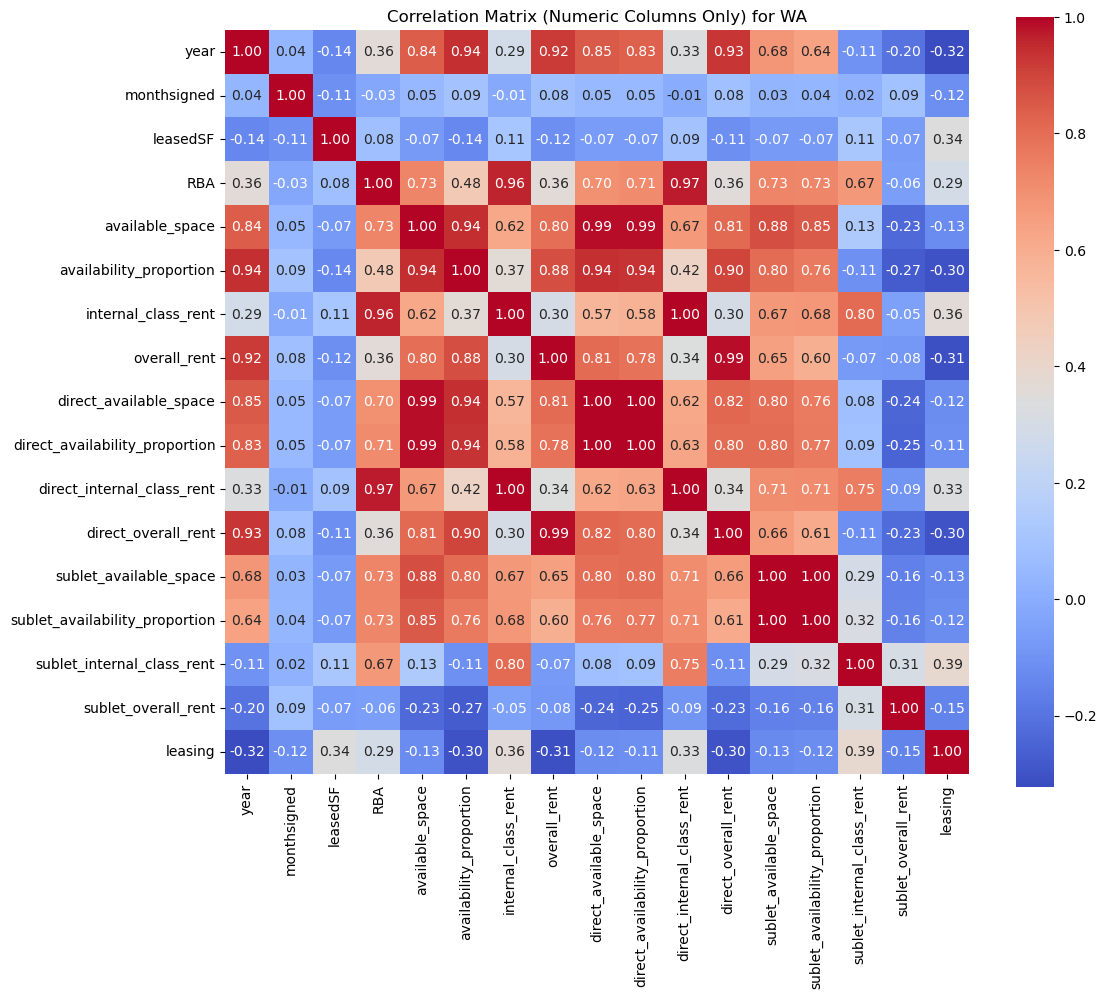

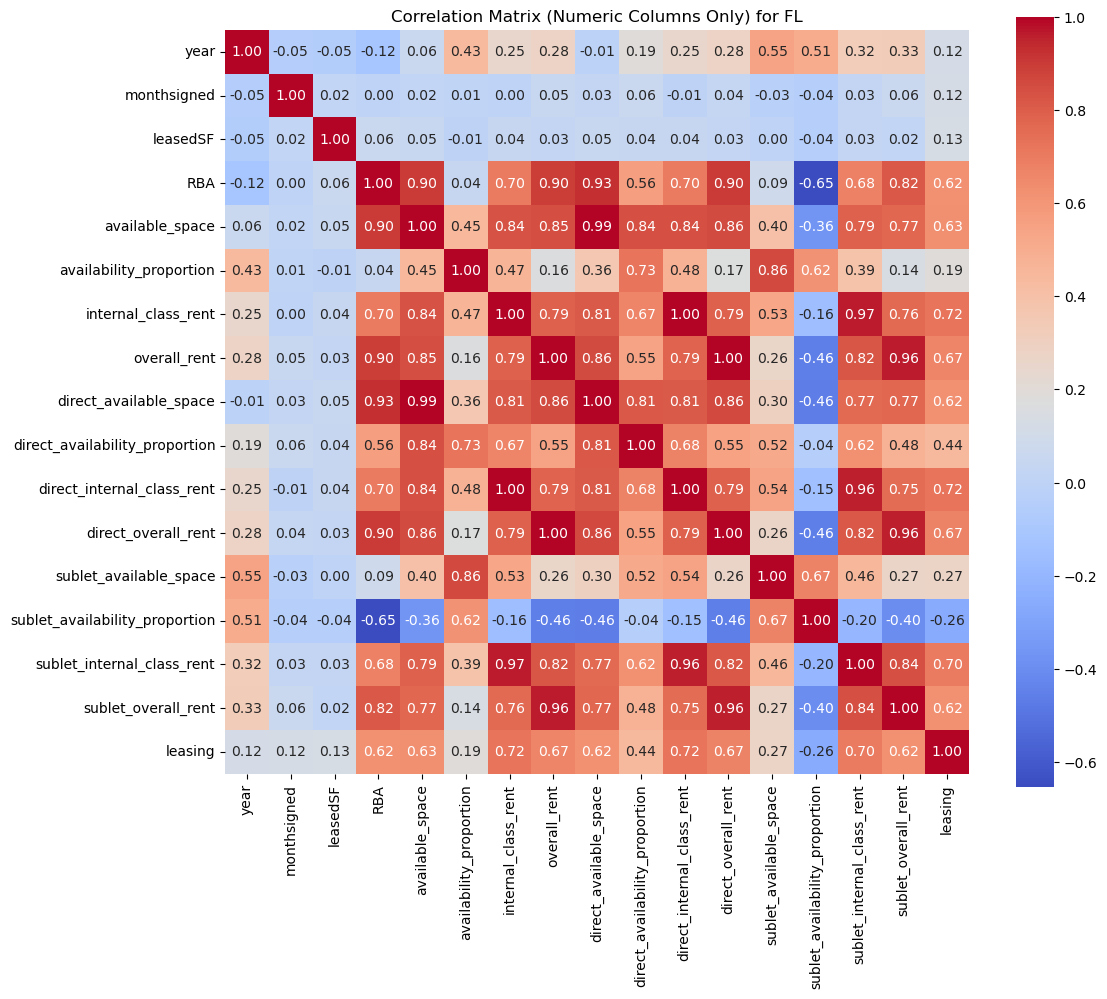

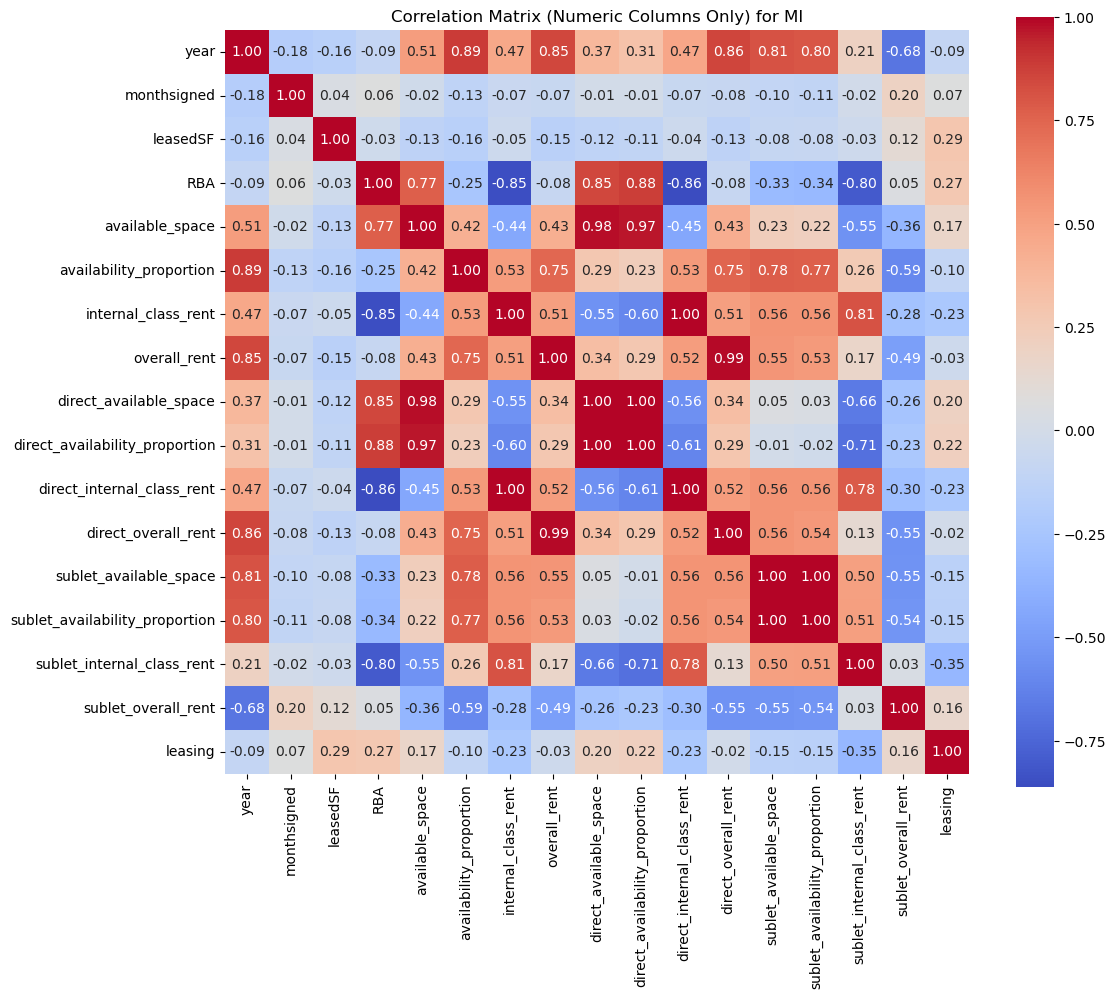

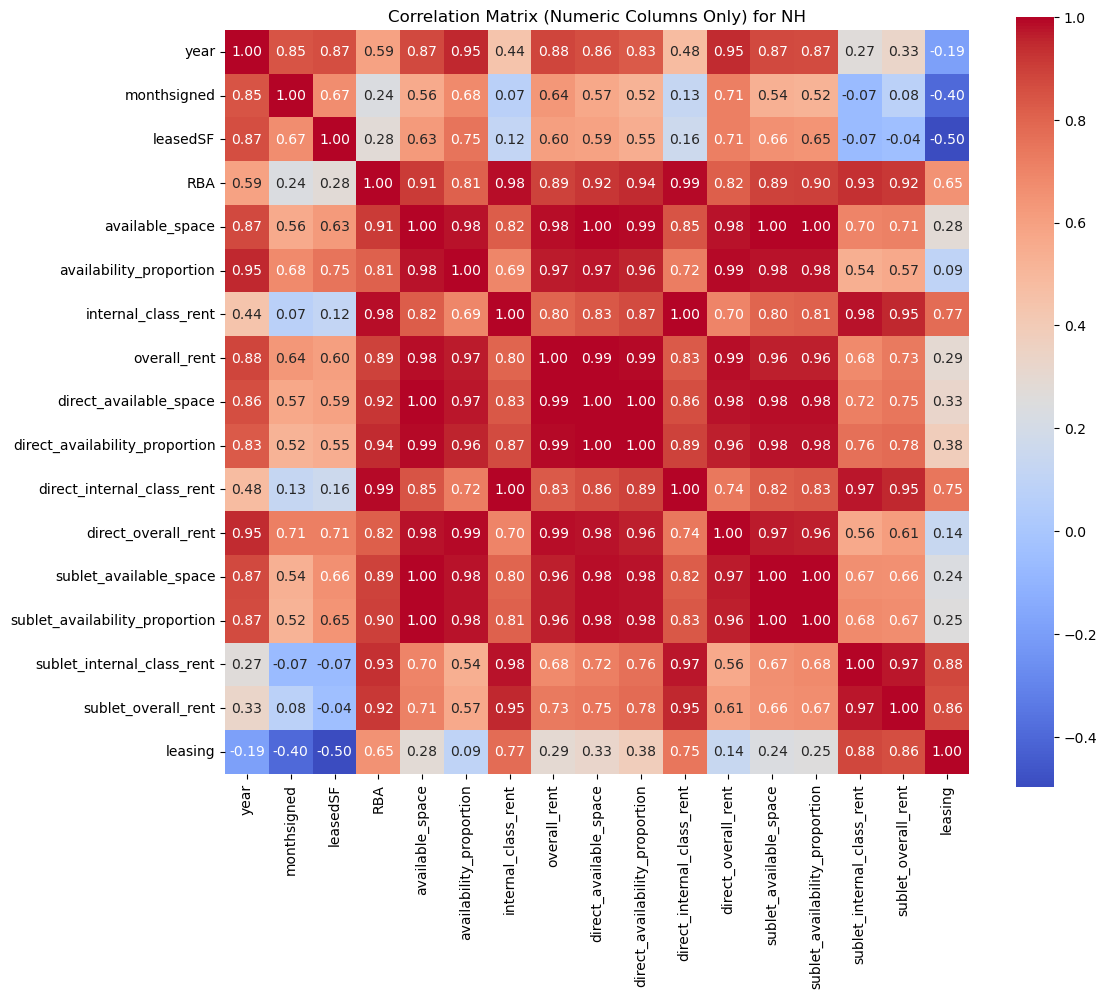

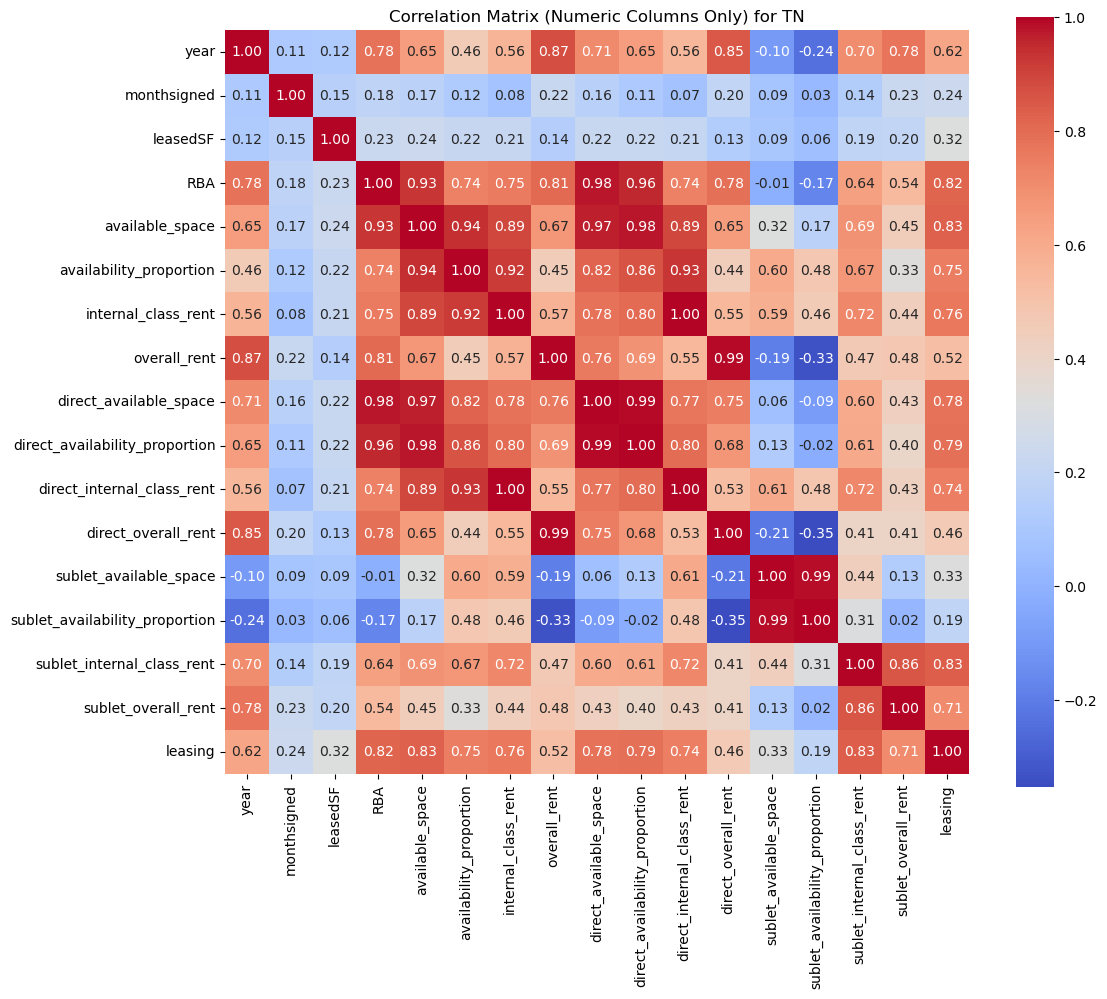

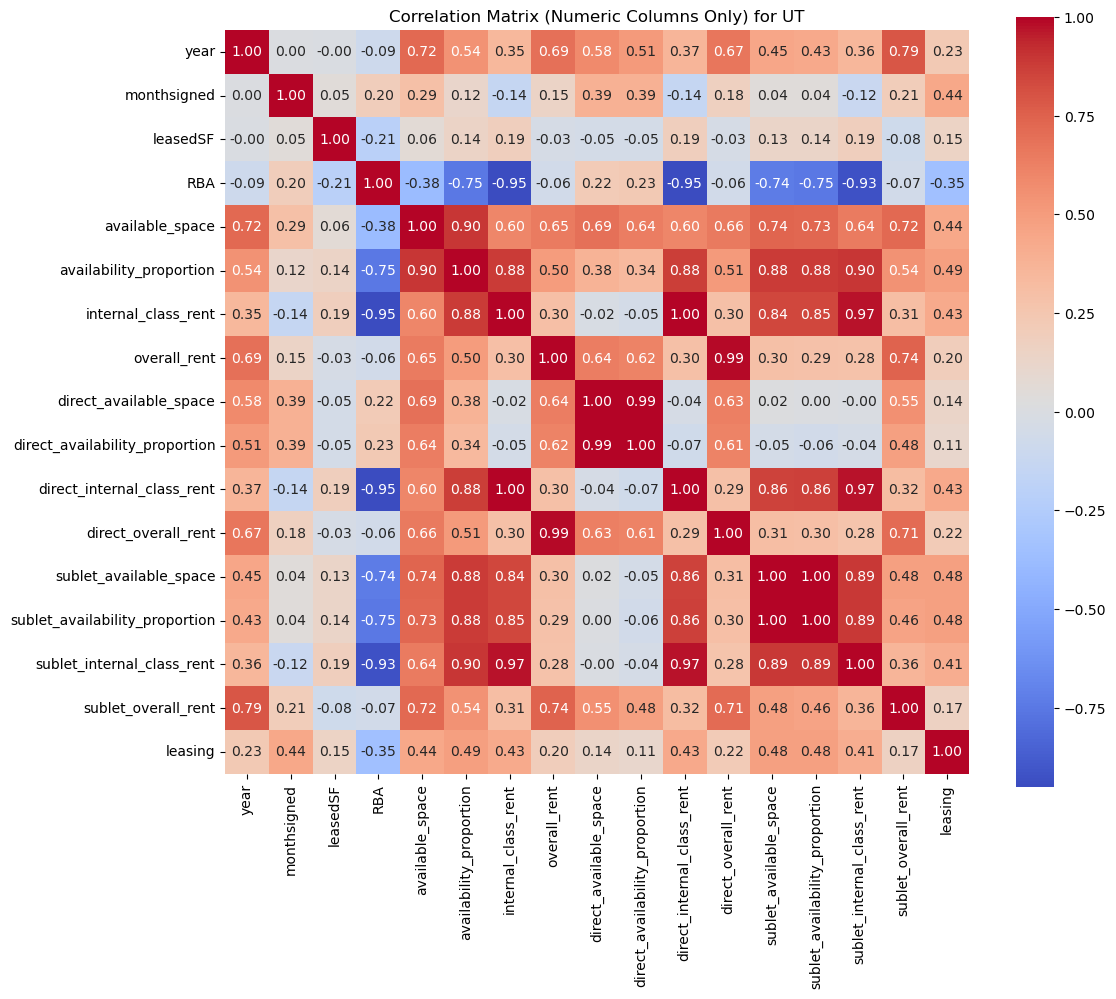

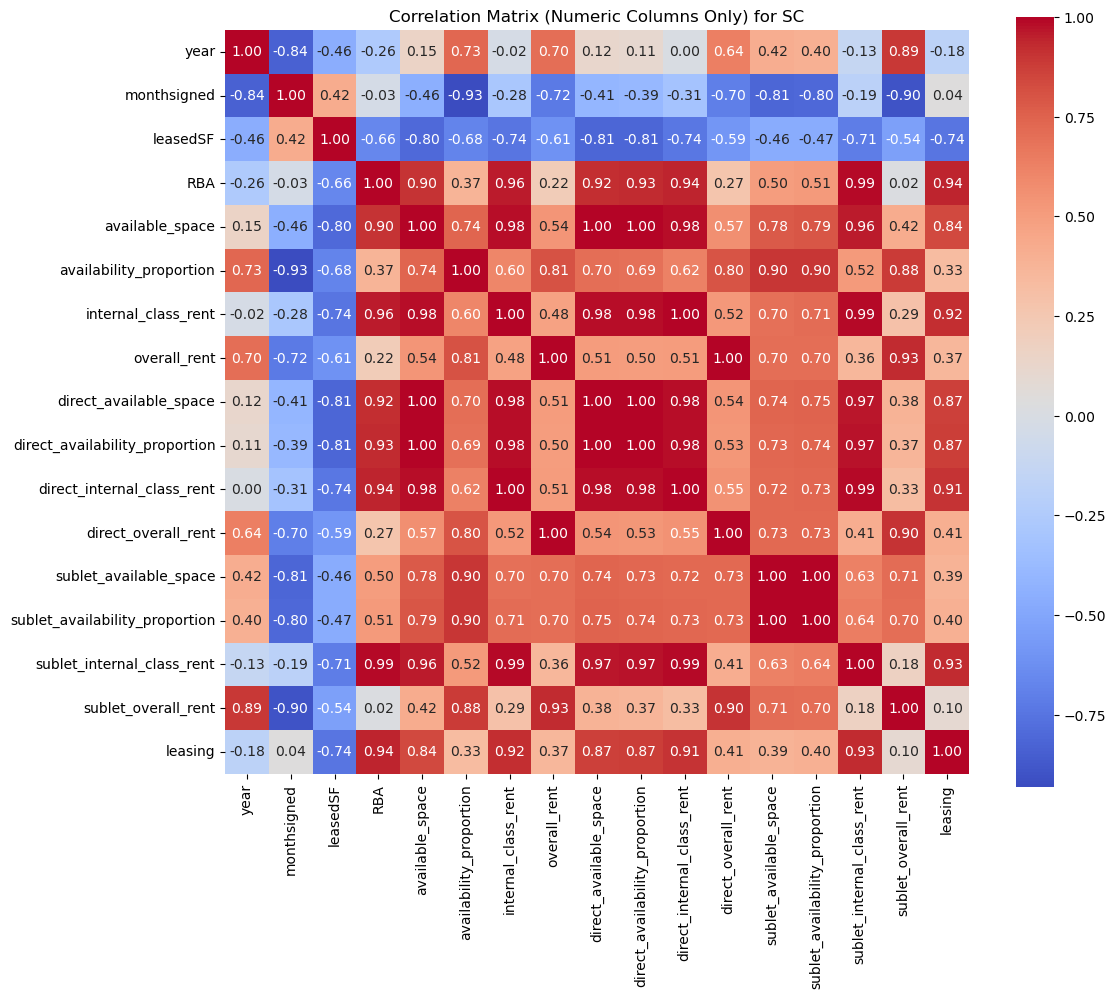

In [ ]:
states = main_with_majorMarketInfo2020_drop['state'].unique()
for state in states:
    numeric_df = main_with_majorMarketInfo2020_drop[main_with_majorMarketInfo2020_drop['state'] == state]
    numeric_df_test = numeric_df.select_dtypes(include='number')
    correlation_matrix = numeric_df_test.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Matrix (Numeric Columns Only) for " + state)
    plt.savefig(f"correlation_matrix_{state}.png", bbox_inches="tight")
    plt.close()